# Decision_Tree

# Q1-Company
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
pip install classification

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
import warnings
warnings.simplefilter('ignore')

In [7]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


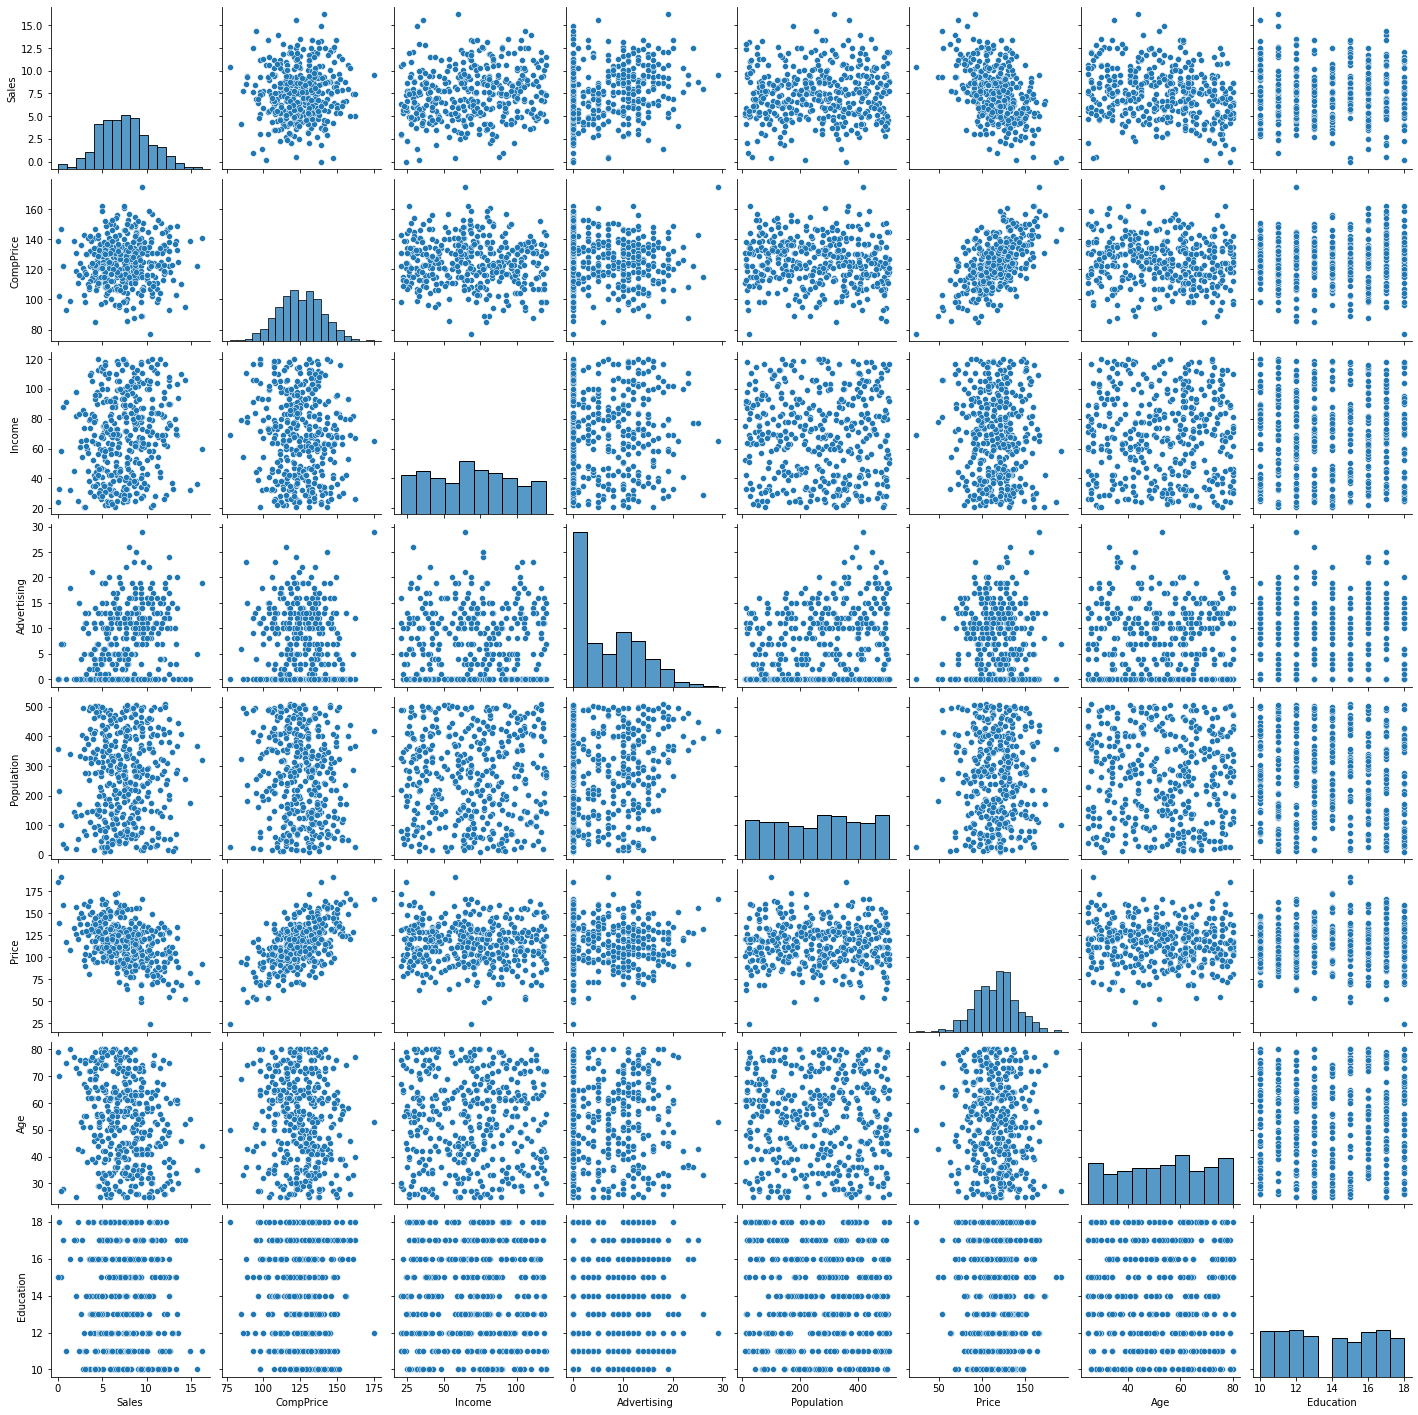

In [10]:
# pairplot
import seaborn as sns
sns.pairplot(df)

In [11]:
corr = df.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


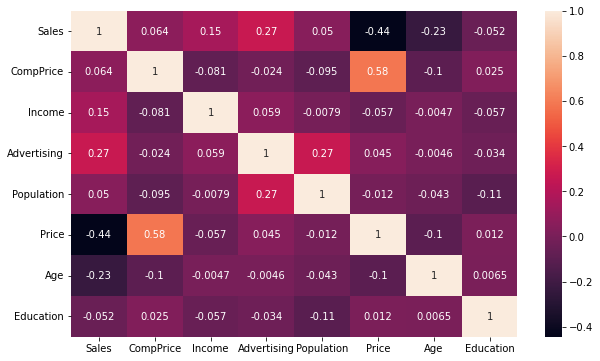

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

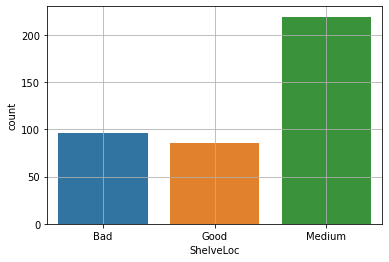

In [16]:
#count plot
sns.countplot(df['ShelveLoc'])
plt.grid(True)
plt.show()

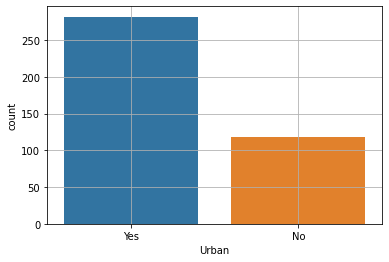

In [17]:
sns.countplot(df['Urban'])
plt.grid(True)
plt.show()

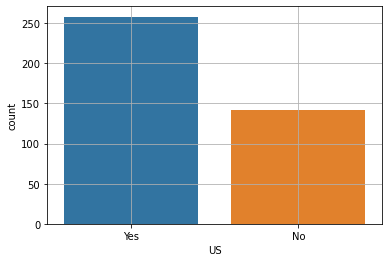

In [19]:
sns.countplot(df['US'])
plt.grid(True)
plt.show()

In [20]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

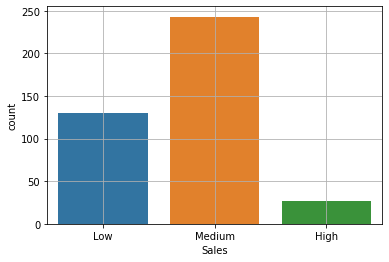

In [22]:
sns.countplot(df['Sales'])
plt.grid(True)
plt.show()

In [24]:
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [25]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [28]:
#encoding categorical company_data
label_encoder = preprocessing.LabelEncoder()

df['Sales'] = label_encoder.fit_transform(df['Sales'])
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [29]:
# Input and Output variables
X = df.drop('Sales', axis = 1)
y = df[['Sales']]

In [30]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [31]:
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (268, 10) 
 y_train_shape : (268, 1)


In [32]:
print('x_test_shape :',x_test.shape ,'\n y_test_shape :',y_test.shape)

x_test_shape : (132, 10) 
 y_test_shape : (132, 1)


# Building model by entropy Criterion

In [33]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
DecisionTreeClassifier(criterion='entropy', max_depth=3)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

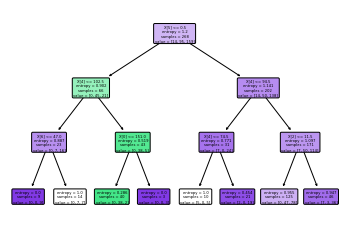

In [35]:
# Plotting Decision tree
tree.plot_tree(model_entropy,filled=True, rounded=True)
plt.show()

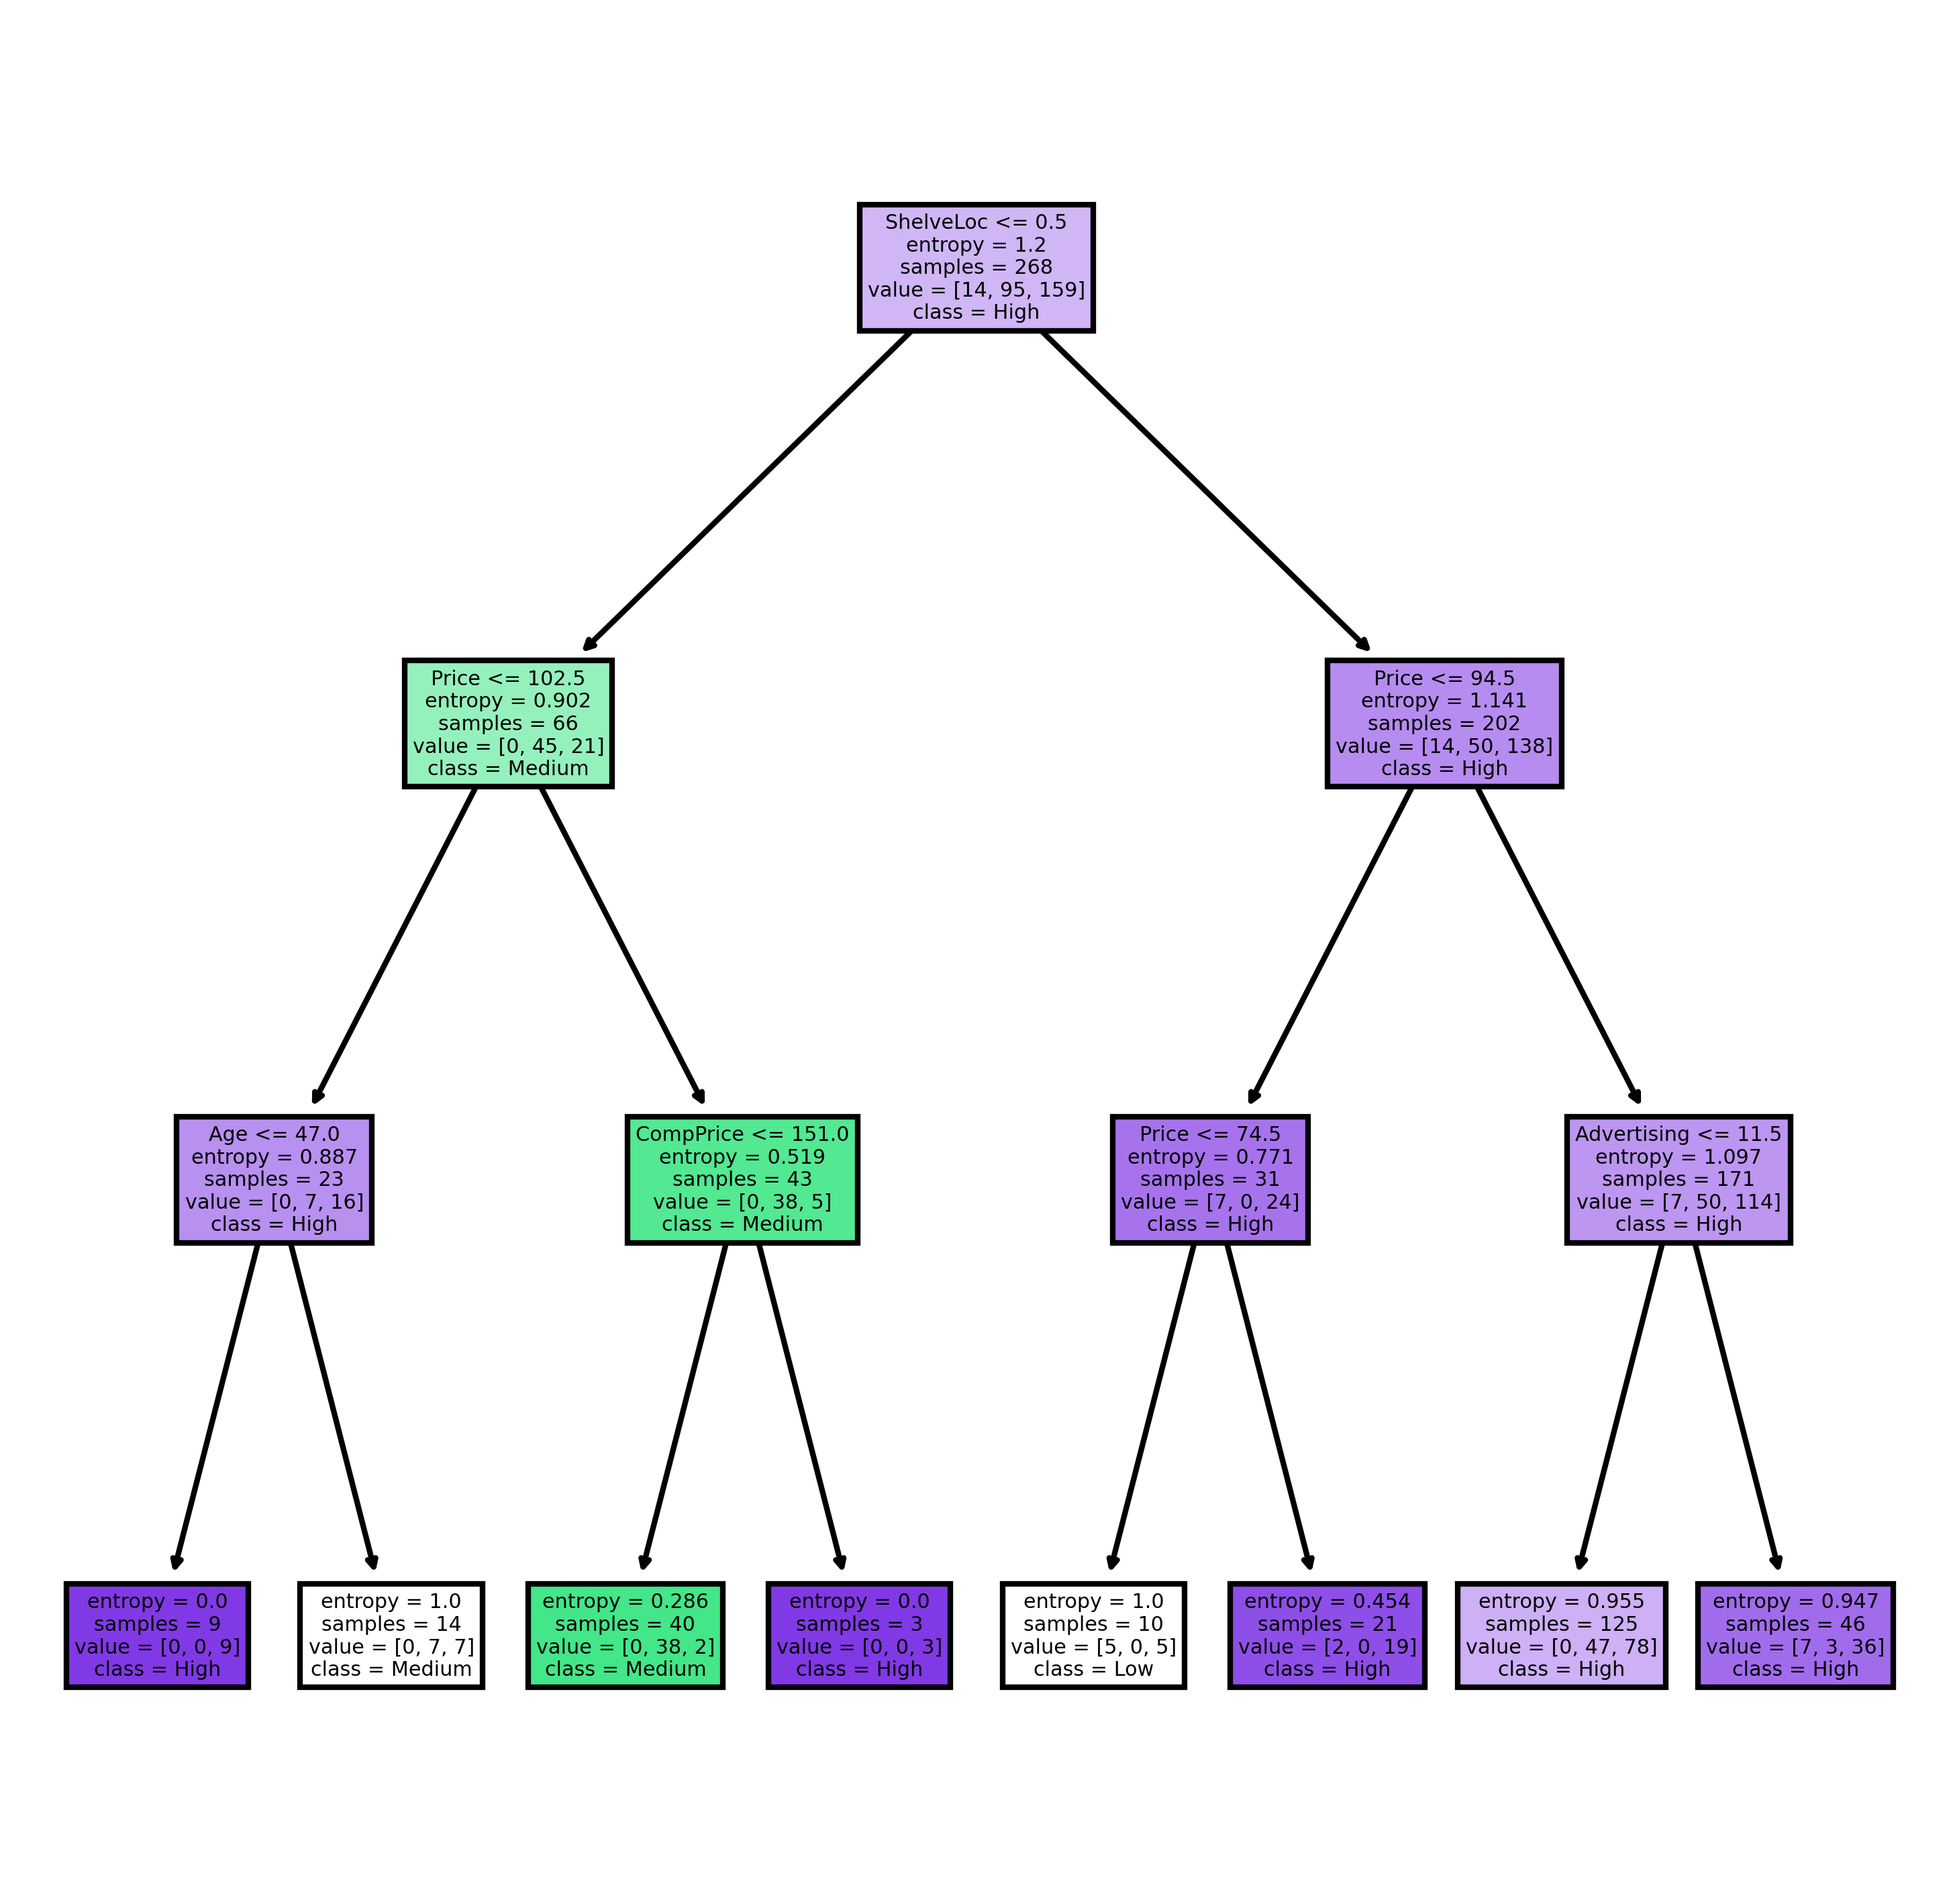

In [36]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [37]:
#prediction train data
pred_train_y = model_entropy.predict(x_train)

In [38]:
# Predicting company_data test data
pred_y_test = model_entropy.predict(x_test)
pred_y_test

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2],
      dtype=int64)

In [39]:
pd.Series(pred_y_test).value_counts()

2    101
1     26
0      5
dtype: int64

Test Data

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
# Checking accuracy of model
accuracy_score(y_test,pred_y_test)

0.6590909090909091

In [43]:
confusion_matrix(y_test,pred_y_test)

array([[ 2,  0, 11],
       [ 0, 15, 20],
       [ 3, 11, 70]], dtype=int64)

Train Data

In [45]:
accuracy_score(y_train,pred_train_y)     #we take max depth=3 , so for train data accuracy is less
                                         # if we do not chose max depth then accuracy score will be 1 for train data

0.7276119402985075

In [46]:
confusion_matrix(y_train,pred_train_y)

array([[  5,   0,   9],
       [  0,  45,  50],
       [  5,   9, 145]], dtype=int64)

# Building model by Gini Criterion

In [47]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=3)

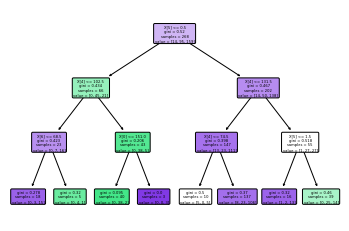

In [49]:
# Plotting Decision tree
tree.plot_tree(model_gini,filled=True, rounded=True)
plt.show()

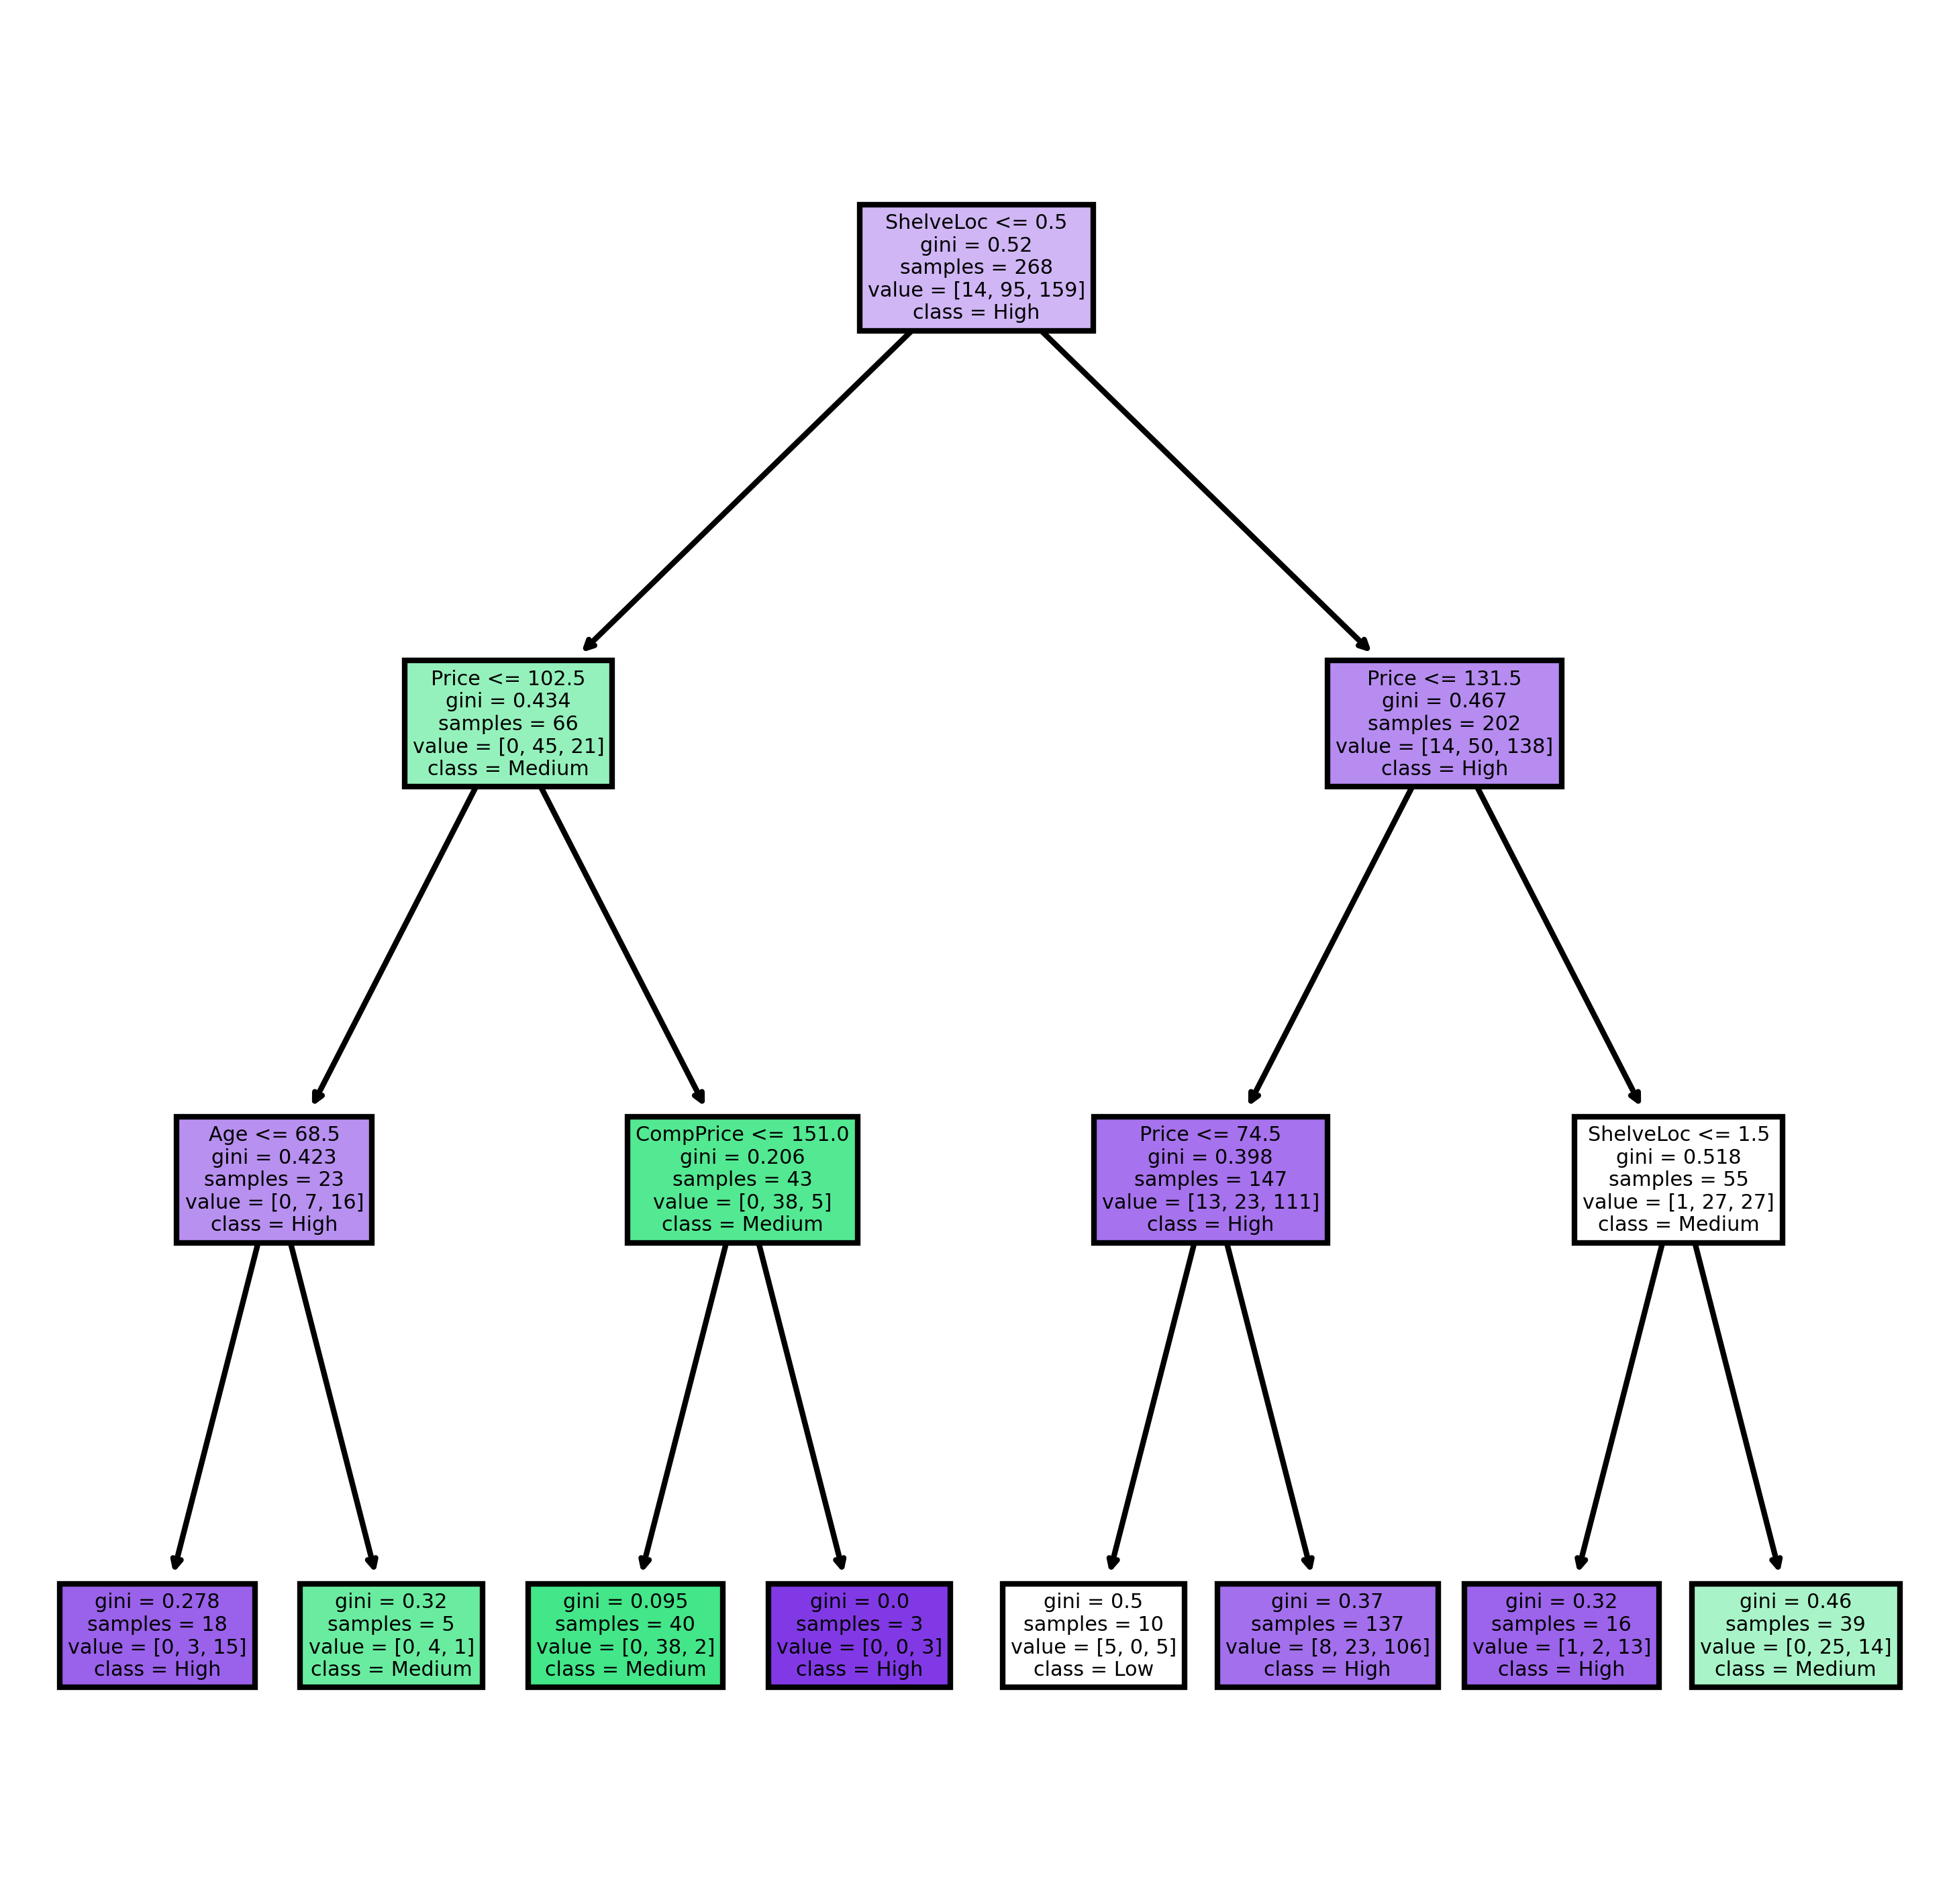

In [50]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True)
plt.show()


In [51]:
#prediction train data
pred_train_y_gini = model_gini.predict(x_train)

In [52]:
# Predicting company_data by gini 
pred_test_y_gini = model_gini.predict(x_test)
pred_test_y_gini

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2],
      dtype=int64)

In [53]:
pd.Series(pred_test_y_gini).value_counts()

2    89
1    38
0     5
dtype: int64

In [54]:
# Checking accuracy of model
accuracy_score(y_test,pred_test_y_gini)

0.6893939393939394

In [57]:
confusion_matrix(y_test,pred_test_y_gini)  #we take max depth=3 , so for train data accuracy is less
                                             # if we do not chose max depth then accuracy score will be 1 for train data

array([[ 2,  0, 11],
       [ 0, 23, 12],
       [ 3, 15, 66]], dtype=int64)

In [58]:
confusion_matrix(y_train,pred_train_y_gini)

array([[  5,   0,   9],
       [  0,  67,  28],
       [  5,  17, 137]], dtype=int64)